## Problem Statement:
### Pedicting effective treatments  for diabetes in turn reducing the readmission into the hospital

In [1]:
from IPython.display import Image
Image("../input/infographic/INFOGRAPHIC.jpg")

FileNotFoundError: No such file or directory: '../input/infographic/INFOGRAPHIC.jpg'

FileNotFoundError: No such file or directory: '../input/infographic/INFOGRAPHIC.jpg'

<IPython.core.display.Image object>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
data = pd.read_csv('diabetic_data.csv')
data.shape

(101766, 50)

# Data Preparation

In [3]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
data.isnull().values.any()

False

In [6]:
data.race.value_counts().plot(kind = 'bar' )

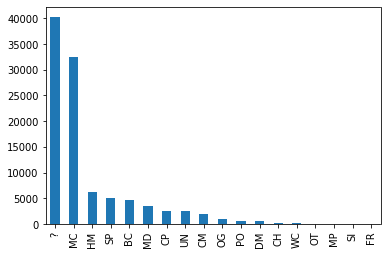

In [7]:
data.payer_code.value_counts().plot(kind = 'bar' )

In [8]:
data.medical_specialty.value_counts()

?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

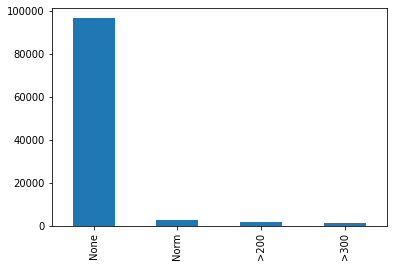

In [9]:
data.max_glu_serum.value_counts().plot(kind = 'bar' )

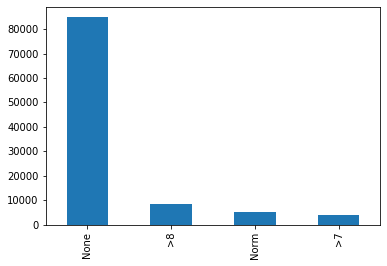

In [10]:
data.A1Cresult.value_counts().plot(kind = 'bar' )

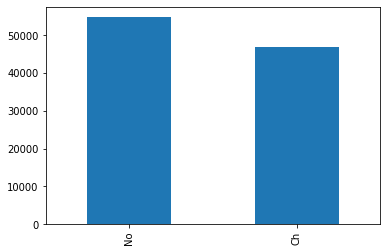

In [11]:
data.change.value_counts().plot(kind = 'bar' )

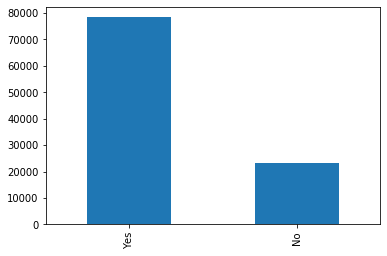

In [12]:
data.diabetesMed.value_counts().plot(kind = 'bar' )

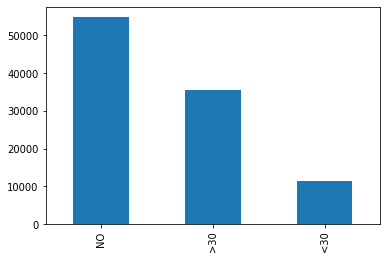

In [13]:
data.readmitted.value_counts().plot(kind = 'bar' )

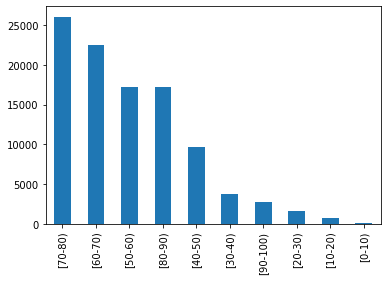

In [14]:
data.age.value_counts().plot(kind = 'bar')

## Filtering patients with Diabetes
### diabetesMed = Yes

In [15]:
data=data[data.diabetesMed=='Yes']
data.shape

(78363, 50)

## Filtering patients who didn't readmit
### readmission = NO

In [16]:
data=data[data.readmitted=='NO']
data.shape

(40934, 50)

## Excluding patients who are Dead and are in hospise

In [17]:
data=data[~data.discharge_disposition_id.isin([11,13,14,19,20])]
data.shape

(39355, 50)

# Handling Missing Values

### We can observe that, Payer code, medical speciality & weight have more than 50% of the missing data, and prefer to drop those features.

In [18]:
data = data.drop(['medical_specialty','payer_code','weight'],axis=1)

**We can observe that the "Race" Feature has some missing values**

**Missing value Imputation using MODE for Race Feature as most of the people in the Dataset are Caucasian**

##### 1. Replacing the ? with NaN's

In [19]:
data['race']=data.race.replace('?',np.nan)


##### 2. Filling the NaN's with the mode

In [20]:
data['race'].fillna(data['race'].mode()[0], inplace=True)


In [21]:
data.race.isnull().sum()

0

In [22]:
data.shape

(39355, 47)

In [23]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [24]:
treatments = data[['encounter_id','metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']].copy()

In [25]:
treatments.head()

,encounter_id,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
2,64410,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No
3,500364,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,16680,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,55842,Steady,No,No,No,Steady,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
8,12522,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Steady,No,No,No,No,No


# Feature Engineering

 ### Custom encoding for the 23 Drug Features


In [26]:
treatments=treatments.replace(['No','Steady','Up','Down'],[0,1,1,1])
treatments.set_index('encounter_id',inplace=True)


In [27]:
treatments.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
encounter_id,,,,,,,,,,,,,,,,,,,,,
64410,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16680,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
55842,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12522,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
treatments.sum(axis=1).value_counts()

1    23080
2    11397
3     4108
4      730
5       39
6        1
dtype: int64

# Patients are Given at max a combination of 6 drugs for treating diabetes

### Feature Engineering - Creating a new feature "Treatments"

**1. When the value of Insuin is '1' , creating the classes "insulin" & "io" (insulin + others )********

In [29]:
i1 = treatments[treatments['insulin']==1].sum(axis = 1).replace([1,2,3,4,5,6],['insulin','io','io','io','io','io'])

In [30]:
i1.value_counts()

insulin    14675
io         12145
dtype: int64

**2. When the value of Insuin is '0' , creating the classes "others" & "no med"**

In [31]:
i0=treatments[treatments['insulin']==0].sum(axis=1).replace([0,1,2,3,4,5,6],['no med','other','other','other','other','other','other'])

In [32]:
i0.value_counts()

other    12535
dtype: int64

In [33]:
treatments=pd.concat([i1,i0])
treatments = pd.DataFrame({'treatments':treatments})

In [34]:
treatments.head()

,treatments
encounter_id,
500364,insulin
16680,io
55842,io
12522,io
15738,io


**Adding the new feature to the Actual Dataframe**

In [35]:
data=data.join(treatments,on='encounter_id') #setting index as encounter_id

In [36]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,treatments
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,other
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,io
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,Steady,No,No,No,No,No,Ch,Yes,NO,io
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,Steady,No,No,No,No,No,Ch,Yes,NO,io


## Since the treatments column was created from the 23 Drugs, We will be removing them

In [37]:
data = data.drop(['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis=1)

## Choosing the records with treatments Insulin and Insulin + other ( w.r.t Problem Statement)

In [38]:
#data=data[data.treatments!='other']
#data.shape

In [39]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted',
       'treatments'],
      dtype='object')

# Here the features which contains numeric values are of type Discrete Quantitative and has a finite set of values. Discrete data can be both Quantitative and Qualitative. So treating outliers in this dataset is not possible

**One hot encoding the nominal categorical values**

In [40]:
data = pd.get_dummies(data, columns=['race', 'gender','max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'readmitted'])

In [41]:
data.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_Yes,readmitted_NO
2,64410,86047875,[20-30),1,1,7,2,11,5,13,...,1,0,0,0,1,0,0,1,1,1
3,500364,82442376,[30-40),1,1,7,2,44,1,16,...,1,0,0,0,1,0,1,0,1,1
4,16680,42519267,[40-50),1,1,7,1,51,0,8,...,1,0,0,0,1,0,1,0,1,1
6,55842,84259809,[60-70),3,1,2,4,70,1,21,...,1,0,0,0,1,0,1,0,1,1
8,12522,48330783,[80-90),2,1,4,13,68,2,28,...,1,0,0,0,1,0,1,0,1,1


** Encoding the AGE(ordinal) categorical column**

In [42]:
data.age.value_counts()

[70-80)     9646
[60-70)     8963
[50-60)     7209
[80-90)     5873
[40-50)     3941
[30-40)     1558
[90-100)    1000
[20-30)      696
[10-20)      363
[0-10)       106
Name: age, dtype: int64

In [43]:
labels = data['age'].astype('category').cat.categories.tolist()
replace_age = {'age' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_age)

{'age': {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4, '[40-50)': 5, '[50-60)': 6, '[60-70)': 7, '[70-80)': 8, '[80-90)': 9, '[90-100)': 10}}


In [44]:
data.replace(replace_age, inplace=True)

In [45]:
data.age.value_counts()

8     9646
7     8963
6     7209
9     5873
5     3941
4     1558
10    1000
3      696
2      363
1      106
Name: age, dtype: int64

# Exploratory Data Analysis

### UNI VARIATE ANALYSIS

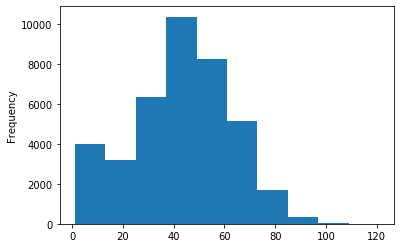

In [46]:
data.num_lab_procedures.plot(kind='hist')

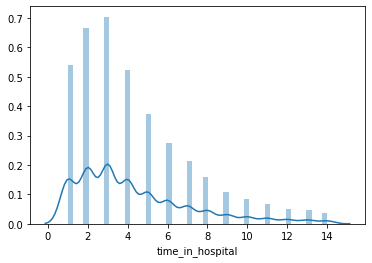

In [47]:
import seaborn as sns
sns.distplot(data.time_in_hospital)

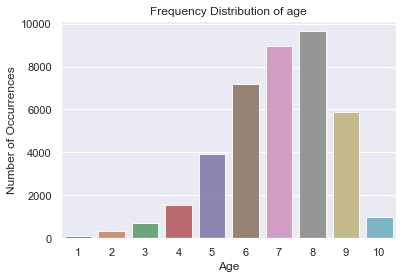

In [48]:
import matplotlib.pyplot as plt
age_count = data['age'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of age')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

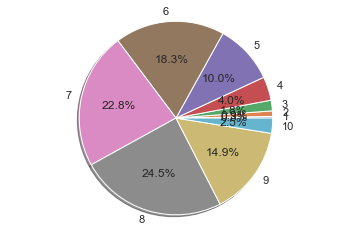

In [49]:
labels = data['age'].astype('category').cat.categories.tolist()
counts = data['age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

# Feature Identification

In [50]:
data.columns

Index(['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'treatments',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Female', 'gender_Male', 'gender_Unknown/Invalid',
       'max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_None',
       'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm', 'change_Ch', 'change_No', 'diabetesMed_Yes',
       'readmitted_NO'],
      dtype='object')

### Considering the Domain knowledge, we would like to drop the Columns "diag_1" , "diag_2" ,"diag_3"

##### Since they contain the information about the codes of different types of treatments given to the patient. They don't contribute to the effectiveness of the treat (i.e, our problemm statement)

In [51]:
# Creating additional columns for diagnosis# Creati 
data['level1_diag1'] = data['diag_1']
data['level2_diag1'] = data['diag_1']
data['level1_diag2'] = data['diag_2']
data['level2_diag2'] = data['diag_2']
data['level1_diag3'] = data['diag_3']
data['level2_diag3'] = data['diag_3']

In [52]:
data.loc[data['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
data.loc[data['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
data.loc[data['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
data.loc[data['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
data.loc[data['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
data.loc[data['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
data['level1_diag1'] = data['level1_diag1'].replace('?', -1)
data['level2_diag1'] = data['level2_diag1'].replace('?', -1)
data['level1_diag2'] = data['level1_diag2'].replace('?', -1)
data['level2_diag2'] = data['level2_diag2'].replace('?', -1)
data['level1_diag3'] = data['level1_diag3'].replace('?', -1)
data['level2_diag3'] = data['level2_diag3'].replace('?', -1)

In [53]:
data['level1_diag1'] = data['level1_diag1'].astype(float)
data['level2_diag1'] = data['level2_diag1'].astype(float)
data['level1_diag2'] = data['level1_diag2'].astype(float)
data['level2_diag2'] = data['level2_diag2'].astype(float)
data['level1_diag3'] = data['level1_diag3'].astype(float)
data['level2_diag3'] = data['level2_diag3'].astype(float)

In [54]:
for index, row in data.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        data.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        data.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        data.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        data.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        data.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        data.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        data.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        data.loc[index, 'level1_diag1'] = 8
    else:
        data.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        data.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        data.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        data.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        data.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        data.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        data.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        data.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        data.loc[index, 'level1_diag2'] = 8
    else:
        data.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        data.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        data.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        data.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        data.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        data.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        data.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        data.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        data.loc[index, 'level1_diag3'] = 8
    else:
        data.loc[index, 'level1_diag3'] = 0

In [55]:
for index, row in data.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        data.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        data.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        data.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        data.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        data.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        data.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        data.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        data.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        data.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        data.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        data.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        data.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        data.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        data.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        data.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        data.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        data.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        data.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        data.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        data.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        data.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        data.loc[index, 'level2_diag1'] = 22
    else:
        data.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        data.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        data.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        data.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        data.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        data.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        data.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        data.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        data.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        data.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        data.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        data.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        data.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        data.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        data.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        data.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        data.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        data.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        data.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        data.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        data.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        data.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        data.loc[index, 'level2_diag2'] = 22
    else:
        data.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        data.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        data.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        data.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        data.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        data.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        data.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        data.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        data.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        data.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        data.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        data.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        data.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        data.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        data.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        data.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        data.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        data.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        data.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        data.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        data.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        data.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        data.loc[index, 'level2_diag3'] = 22
    else:
        data.loc[index, 'level2_diag3'] = 0

In [56]:
data = data.drop(['diag_1','diag_2','diag_3'],axis = 1)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39355 entries, 2 to 101764
Data columns (total 41 columns):
encounter_id                39355 non-null int64
patient_nbr                 39355 non-null int64
age                         39355 non-null int64
admission_type_id           39355 non-null int64
discharge_disposition_id    39355 non-null int64
admission_source_id         39355 non-null int64
time_in_hospital            39355 non-null int64
num_lab_procedures          39355 non-null int64
num_procedures              39355 non-null int64
num_medications             39355 non-null int64
number_outpatient           39355 non-null int64
number_emergency            39355 non-null int64
number_inpatient            39355 non-null int64
number_diagnoses            39355 non-null int64
treatments                  39355 non-null object
race_AfricanAmerican        39355 non-null uint8
race_Asian                  39355 non-null uint8
race_Caucasian              39355 non-null uint8
race_Hi

## With respect to the problem statement given, the output variable is observed to be the “treatments” feature
## The input variables are both Discrete Quantitative and Categorical and our output variable is Categorical


## Since we have a combination of Discrete Quantitative Variables and Categorical Variables, we cannot perform general Correlation tests

In [58]:
from IPython.display import Image
Image("../input/correlation/Picture1.png")

FileNotFoundError: No such file or directory: '../input/correlation/Picture1.png'

FileNotFoundError: No such file or directory: '../input/correlation/Picture1.png'

<IPython.core.display.Image object>

### We will be performing Chi-Square Test of Independence for finding the Correlation btw the variables

# Chi-Square Test of Independence

In [59]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [60]:
data['dummyCat'] = np.random.choice([0, 1], size=(len(data),), p=[0.5, 0.5])

data.dummyCat.value_counts()

0    19725
1    19630
Name: dummyCat, dtype: int64

In [61]:
data.columns

Index(['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'treatments', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Female',
       'gender_Male', 'gender_Unknown/Invalid', 'max_glu_serum_>200',
       'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm',
       'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm',
       'change_Ch', 'change_No', 'diabetesMed_Yes', 'readmitted_NO',
       'level1_diag1', 'level2_diag1', 'level1_diag2', 'level2_diag2',
       'level1_diag3', 'level2_diag3', 'dummyCat'],
      dtype='object')

In [62]:
#Initialize ChiSquare Class
cT = ChiSquare(data)

#Feature Selection
testColumns = ['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Female', 'gender_Male',
       'max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_None',
       'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm', 'change_Ch', 'change_No', 'diabetesMed_Yes',
       'readmitted_NO','level1_diag1', 'level2_diag1', 'level1_diag2', 'level2_diag2',
       'level1_diag3', 'level2_diag3', 'dummyCat']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="treatments" ) 

encounter_id is NOT an important predictor. (Discard encounter_id from model)
patient_nbr is NOT an important predictor. (Discard patient_nbr from model)
age is IMPORTANT for Prediction
admission_type_id is IMPORTANT for Prediction
discharge_disposition_id is IMPORTANT for Prediction
admission_source_id is IMPORTANT for Prediction
time_in_hospital is IMPORTANT for Prediction
num_lab_procedures is IMPORTANT for Prediction
num_procedures is IMPORTANT for Prediction
num_medications is IMPORTANT for Prediction
number_outpatient is IMPORTANT for Prediction
number_emergency is IMPORTANT for Prediction
number_inpatient is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
race_AfricanAmerican is IMPORTANT for Prediction
race_Asian is IMPORTANT for Prediction
race_Caucasian is IMPORTANT for Prediction
race_Hispanic is IMPORTANT for Prediction
race_Other is NOT an important predictor. (Discard race_Other from model)
gender_Female is IMPORTANT for Prediction
gender_Male is IMP

# Model Building
## Train Test Split

Since our target variable is Categorical , We would be importing the required Classification model packages

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [64]:
X = data.drop(['encounter_id','patient_nbr','race_Other','diabetesMed_Yes','readmitted_NO','dummyCat','treatments'],axis=1)
Y = data['treatments']
print(X.shape)
print(Y.shape)

(39355, 35)
(39355,)


In [65]:
X.columns

Index(['age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'gender_Female', 'gender_Male', 'gender_Unknown/Invalid',
       'max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_None',
       'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm', 'change_Ch', 'change_No', 'level1_diag1',
       'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
       'level2_diag3'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((27548, 35), (11807, 35), (27548,), (11807,))

# Base Model

In [67]:
y_p=[]
for i in range(y_test.shape[0]):
    y_p.append(y_test.mode()[0])#Highest class is assigned to a list which is compared with ytest
len(y_p) 

11807

In [68]:
y_pred=pd.Series(y_p)

In [69]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.37443889218260357


## Our Baseline accuracy is 54% 
#### We can set the accuracy as 54% and the models we build should be giving us accuracies greater than 54%

# Predictive Model Development - Iteration 1 

## Baseline Models - Logistic Regression 

In [75]:
#Logistic Regression
m1=LogisticRegression()
m1.fit(X_train,y_train)
y_pred_lr=m1.predict(X_test)
Train_Score_lr = m1.score(X_train,y_train)
Test_Score_lr = accuracy_score(y_test,y_pred_lr)


print('Training Accuracy is:',Train_Score_lr)
print('Testing Accuracy is:',Test_Score_lr)
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

C:\Users\THARMESH.V.R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\THARMESH.V.R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuracy is: 0.564904893277189
Testing Accuracy is: 0.5645803337003472
[[1861 1638  922]
 [ 144 3440   59]
 [1067 1311 1365]]
              precision    recall  f1-score   support

     insulin       0.61      0.42      0.50      4421
          io       0.54      0.94      0.69      3643
       other       0.58      0.36      0.45      3743

    accuracy                           0.56     11807
   macro avg       0.58      0.58      0.54     11807
weighted avg       0.58      0.56      0.54     11807



## KNN

In [71]:
m2 = KNeighborsClassifier()
m2.fit(X_train,y_train)
y_pred_knn = m2.predict(X_test)
Train_Score_knn = m2.score(X_train,y_train)
Test_Score_knn = accuracy_score(y_test,y_pred_knn)

print('Training Accuracy is :',Train_Score_knn)
print('Testing Accuracy is:',Test_Score_knn)
print(classification_report(y_test,y_pred_knn))


Training Accuracy is : 0.6208073181356178
Testing Accuracy is: 0.42838993817227067
              precision    recall  f1-score   support

     insulin       0.43      0.53      0.48      4421
          io       0.39      0.38      0.38      3643
       other       0.48      0.35      0.40      3743

    accuracy                           0.43     11807
   macro avg       0.43      0.42      0.42     11807
weighted avg       0.43      0.43      0.43     11807



## Bernoulli Naives Bayes

In [72]:
m3=BernoulliNB()
m3.fit(X_train,y_train)
y_pred_bnb=m3.predict(X_test)
Train_Score_bnb = m3.score(X_train,y_train)
Test_Score_bnb = accuracy_score(y_test,y_pred_bnb)

print('Training Accuracy :',Train_Score_bnb)
print('Testing Accuracy  :',Test_Score_bnb)
print(confusion_matrix(y_test,y_pred_bnb))
print(classification_report(y_test,y_pred_bnb))

Training Accuracy : 0.5372803833309133
Testing Accuracy  : 0.5303633437791141
[[1063 1952 1406]
 [   1 3642    0]
 [ 757 1429 1557]]
              precision    recall  f1-score   support

     insulin       0.58      0.24      0.34      4421
          io       0.52      1.00      0.68      3643
       other       0.53      0.42      0.46      3743

    accuracy                           0.53     11807
   macro avg       0.54      0.55      0.50     11807
weighted avg       0.55      0.53      0.49     11807



## Decision Trees

In [76]:
m4 = DecisionTreeClassifier()
m4.fit(X_train,y_train)
y_pred_dt=m4.predict(X_test)
Train_Score_dt = m4.score(X_train,y_train)
Test_Score_dt = accuracy_score(y_test,y_pred_dt)

print('Training Accuracy :',Train_Score_dt)
print('Testing Accuracy :',Test_Score_dt)
print(classification_report(y_test,y_pred_dt))

Training Accuracy : 1.0
Testing Accuracy : 0.49292792411281444
              precision    recall  f1-score   support

     insulin       0.48      0.48      0.48      4421
          io       0.55      0.54      0.54      3643
       other       0.45      0.46      0.46      3743

    accuracy                           0.49     11807
   macro avg       0.49      0.49      0.49     11807
weighted avg       0.49      0.49      0.49     11807



## Random Forest

In [77]:
m5 = RandomForestClassifier()
m5.fit(X_train,y_train)
y_pred_rf=m5.predict(X_test)
Train_Score_rf = m5.score(X_train,y_train)
Test_Score_rf = accuracy_score(y_test,y_pred_rf)

print('Training Accuracy :',Train_Score_rf)
print('Testing Accuracy :',Test_Score_rf)
print(classification_report(y_test,y_pred_rf))

C:\Users\THARMESH.V.R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy : 0.9854435893712792
Testing Accuracy : 0.5455238417887693
              precision    recall  f1-score   support

     insulin       0.53      0.53      0.53      4421
          io       0.55      0.71      0.62      3643
       other       0.56      0.40      0.47      3743

    accuracy                           0.55     11807
   macro avg       0.55      0.55      0.54     11807
weighted avg       0.55      0.55      0.54     11807



# Predictive Model Development - Iteration 2

## Hyperparameter Tuning

### For Decision Tree

In [78]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                       

In [79]:
tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

In [80]:
m6 = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=100,min_samples_split=50)
m6.fit(X_train,y_train)
y_pred_tdt=m6.predict(X_test)
Train_Score_tdt = m6.score(X_train,y_train)
Test_Score_tdt = accuracy_score(y_test,y_pred_tdt)

print('Training Accuracy :',Train_Score_tdt)
print('Testing Accuracy  :',Test_Score_tdt)
print(classification_report(y_test,y_pred_tdt))


Training Accuracy : 0.5909684913605343
Testing Accuracy  : 0.5668671127297366
              precision    recall  f1-score   support

     insulin       0.59      0.42      0.49      4421
          io       0.54      0.90      0.68      3643
       other       0.59      0.41      0.49      3743

    accuracy                           0.57     11807
   macro avg       0.58      0.58      0.55     11807
weighted avg       0.58      0.57      0.55     11807



### For KNN

In [77]:
#Gridsearch CV to find Optimal K value for KNN model
grid = {'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=3)
knn_cv.fit(X_train,y_train)


print("Tuned Hyperparameter k: {}".format(knn_cv.best_params_))

Tuned Hyperparameter k: {'n_neighbors': 39}


In [81]:
m7 = KNeighborsClassifier(n_neighbors=39)
m7.fit(X_train,y_train)
y_pred_tknn=m7.predict(X_test)
Train_Score_tknn = m7.score(X_train,y_train)
Test_Score_tknn = accuracy_score(y_test,y_pred_tknn)


print('Training Accuracy :',Train_Score_tknn)
print('Testing Accuracy  :',Test_Score_tknn)
print(classification_report(y_test,y_pred_tknn))

Training Accuracy : 0.5035211267605634
Testing Accuracy  : 0.45117303294655714
              precision    recall  f1-score   support

     insulin       0.45      0.52      0.48      4421
          io       0.43      0.34      0.38      3643
       other       0.47      0.48      0.48      3743

    accuracy                           0.45     11807
   macro avg       0.45      0.45      0.45     11807
weighted avg       0.45      0.45      0.45     11807



### For Random Forest 

In [79]:
parameter={'n_estimators':np.arange(1,101)}
gs = GridSearchCV(m5,parameter,cv=3)
gs.fit(X_train,y_train)
gs.best_params_



{'n_estimators': 100}

In [82]:
m8 = RandomForestClassifier(n_estimators=96)
m8.fit(X_train,y_train) 
y_pred_trf=m8.predict(X_test)
Train_Score_trf = m8.score(X_train,y_train)
Test_Score_trf = accuracy_score(y_test,y_pred_trf)


print('Training Accuracy :',Train_Score_trf)
print('Testing Accuracy  :',Test_Score_trf)
print(classification_report(y_test,y_pred_trf))

Training Accuracy : 1.0
Testing Accuracy  : 0.5898195985432371
              precision    recall  f1-score   support

     insulin       0.62      0.48      0.54      4421
          io       0.56      0.87      0.68      3643
       other       0.62      0.44      0.52      3743

    accuracy                           0.59     11807
   macro avg       0.60      0.60      0.58     11807
weighted avg       0.60      0.59      0.58     11807



In [83]:
parameter={'n_estimators':np.arange(1,101)}
gsdt = GridSearchCV(dt_adb,parameter,cv=3)
gsdt.fit(X_train,y_train)
gsdt.best_params_

NameError: name 'dt_adb' is not defined

In [ ]:
for i in [10,43,51]:
    print('n =',i)
    r=[]
    for j in [0,1,2]:
        xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=j)
        rf=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0 )
        rf.fit(xtrain,ytrain)
        ypred_rf=rf.predict(xtest)
        cm_rf=metrics.confusion_matrix(ytest,ypred_rf)
        print(metrics.recall_score(ytest,ypred_rf)*100)
        r.append(metrics.recall_score(ytest,ypred_rf)*100)
    print('mean =',np.mean(r),'var =',np.var(r,ddof=1))
    print()

In [81]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
dt_bag=BaggingClassifier(n_estimators=6,random_state=0)
dt_adb=AdaBoostClassifier(n_estimators=50,random_state=0)
rf_adb=AdaBoostClassifier(base_estimator=m8,n_estimators=400,random_state=0)

In [82]:
from sklearn import model_selection

In [83]:
models = []
models.append(('DecisionTree', m6))
models.append(('RandomForest', m8))
models.append(('bagged DecisionTree', dt_bag))
models.append(('Boosted DecisionTree', dt_adb))
models.append(('Boosted RandomForest', rf_adb))

DecisionTree: 0.552662 (0.000071)
RandomForest: 0.568975 (0.000063)
bagged DecisionTree: 0.506797 (0.000053)
Boosted DecisionTree: 0.571414 (0.000045)
Boosted RandomForest: 0.570017 (0.000042)


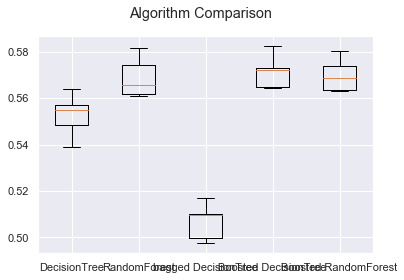

In [84]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Predictive Model Development - Iteration 3 

## CatBoostClassifier

In [84]:
data.treatments.replace(['insulin','io','other'],[0,1,2],inplace = True)

In [85]:
a = data.drop(['age','treatments'],axis=1)
b = data.treatments

In [86]:
cate_features_index = np.where(a.dtypes != int)[0]


In [87]:
xtrain,xtest,ytrain,ytest = train_test_split(a,b,train_size=.70,random_state=2)


In [88]:
from catboost import CatBoostClassifier

In [89]:
#from sklearn.ensemble import CatBoostClassifier

In [90]:
#from sklearn.ensemble import CatBoostClassifier
from catboost import CatBoostClassifier, Pool,cv
#let us make the catboost model, use_best_model params will make the model prevent overfitting
model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)

In [91]:
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

0:	learn: 0.5469000	test: 0.5444228	best: 0.5444228 (0)	total: 529ms	remaining: 8m 48s
1:	learn: 0.5607304	test: 0.5589057	best: 0.5589057 (1)	total: 842ms	remaining: 7m
2:	learn: 0.5673007	test: 0.5644109	best: 0.5644109 (2)	total: 1.22s	remaining: 6m 46s
3:	learn: 0.5681719	test: 0.5643262	best: 0.5644109 (2)	total: 1.39s	remaining: 5m 45s
4:	learn: 0.5682445	test: 0.5645803	best: 0.5645803 (4)	total: 1.74s	remaining: 5m 46s
5:	learn: 0.5680267	test: 0.5676294	best: 0.5676294 (5)	total: 2.11s	remaining: 5m 48s
6:	learn: 0.5708944	test: 0.5685610	best: 0.5685610 (6)	total: 2.47s	remaining: 5m 50s
7:	learn: 0.5696602	test: 0.5672059	best: 0.5685610 (6)	total: 2.83s	remaining: 5m 50s
8:	learn: 0.5698417	test: 0.5668671	best: 0.5685610 (6)	total: 3.15s	remaining: 5m 46s
9:	learn: 0.5699143	test: 0.5672906	best: 0.5685610 (6)	total: 3.5s	remaining: 5m 46s
10:	learn: 0.5709307	test: 0.5687304	best: 0.5687304 (10)	total: 3.86s	remaining: 5m 47s
11:	learn: 0.5706403	test: 0.5677988	best: 0.5

94:	learn: 0.5851967	test: 0.5814347	best: 0.5822817 (84)	total: 57.2s	remaining: 9m 4s
95:	learn: 0.5849063	test: 0.5818582	best: 0.5822817 (84)	total: 57.5s	remaining: 9m 1s
96:	learn: 0.5849063	test: 0.5824511	best: 0.5824511 (96)	total: 58.1s	remaining: 9m
97:	learn: 0.5853056	test: 0.5821123	best: 0.5824511 (96)	total: 58.5s	remaining: 8m 58s
98:	learn: 0.5853056	test: 0.5823664	best: 0.5824511 (96)	total: 59s	remaining: 8m 57s
99:	learn: 0.5857776	test: 0.5816888	best: 0.5824511 (96)	total: 59.2s	remaining: 8m 52s
100:	learn: 0.5857413	test: 0.5816041	best: 0.5824511 (96)	total: 59.6s	remaining: 8m 50s
101:	learn: 0.5856687	test: 0.5811807	best: 0.5824511 (96)	total: 1m	remaining: 8m 48s
102:	learn: 0.5857413	test: 0.5814347	best: 0.5824511 (96)	total: 1m	remaining: 8m 45s
103:	learn: 0.5859591	test: 0.5816041	best: 0.5824511 (96)	total: 1m	remaining: 8m 45s
104:	learn: 0.5864673	test: 0.5822817	best: 0.5824511 (96)	total: 1m 1s	remaining: 8m 42s
105:	learn: 0.5867214	test: 0.582

186:	learn: 0.5930013	test: 0.5860083	best: 0.5860930 (142)	total: 1m 34s	remaining: 6m 50s
187:	learn: 0.5931102	test: 0.5866012	best: 0.5866012 (187)	total: 1m 34s	remaining: 6m 49s
188:	learn: 0.5933280	test: 0.5860083	best: 0.5866012 (187)	total: 1m 35s	remaining: 6m 49s
189:	learn: 0.5934006	test: 0.5861777	best: 0.5866012 (187)	total: 1m 35s	remaining: 6m 47s
190:	learn: 0.5931465	test: 0.5862624	best: 0.5866012 (187)	total: 1m 35s	remaining: 6m 46s
191:	learn: 0.5936910	test: 0.5862624	best: 0.5866012 (187)	total: 1m 36s	remaining: 6m 45s
192:	learn: 0.5938362	test: 0.5866012	best: 0.5866012 (187)	total: 1m 36s	remaining: 6m 45s
193:	learn: 0.5939088	test: 0.5864318	best: 0.5866012 (187)	total: 1m 37s	remaining: 6m 43s
194:	learn: 0.5938362	test: 0.5866012	best: 0.5866012 (187)	total: 1m 37s	remaining: 6m 43s
195:	learn: 0.5934732	test: 0.5864318	best: 0.5866012 (187)	total: 1m 38s	remaining: 6m 42s
196:	learn: 0.5936547	test: 0.5865165	best: 0.5866012 (187)	total: 1m 38s	remain

276:	learn: 0.5985552	test: 0.5875328	best: 0.5884645 (239)	total: 2m 9s	remaining: 5m 38s
277:	learn: 0.5985915	test: 0.5874481	best: 0.5884645 (239)	total: 2m 9s	remaining: 5m 37s
278:	learn: 0.5985915	test: 0.5875328	best: 0.5884645 (239)	total: 2m 9s	remaining: 5m 35s
279:	learn: 0.5985915	test: 0.5873634	best: 0.5884645 (239)	total: 2m 10s	remaining: 5m 35s
280:	learn: 0.5984100	test: 0.5873634	best: 0.5884645 (239)	total: 2m 10s	remaining: 5m 34s
281:	learn: 0.5983737	test: 0.5874481	best: 0.5884645 (239)	total: 2m 11s	remaining: 5m 33s
282:	learn: 0.5985189	test: 0.5875328	best: 0.5884645 (239)	total: 2m 11s	remaining: 5m 33s
283:	learn: 0.5984100	test: 0.5870246	best: 0.5884645 (239)	total: 2m 12s	remaining: 5m 33s
284:	learn: 0.5983011	test: 0.5870246	best: 0.5884645 (239)	total: 2m 12s	remaining: 5m 32s
285:	learn: 0.5983737	test: 0.5871093	best: 0.5884645 (239)	total: 2m 12s	remaining: 5m 31s
286:	learn: 0.5985915	test: 0.5871093	best: 0.5884645 (239)	total: 2m 13s	remaining

366:	learn: 0.6019675	test: 0.5897349	best: 0.5901584 (342)	total: 2m 49s	remaining: 4m 52s
367:	learn: 0.6019675	test: 0.5897349	best: 0.5901584 (342)	total: 2m 50s	remaining: 4m 52s
368:	learn: 0.6020038	test: 0.5899043	best: 0.5901584 (342)	total: 2m 50s	remaining: 4m 52s
369:	learn: 0.6020038	test: 0.5897349	best: 0.5901584 (342)	total: 2m 51s	remaining: 4m 51s
370:	learn: 0.6020401	test: 0.5897349	best: 0.5901584 (342)	total: 2m 51s	remaining: 4m 51s
371:	learn: 0.6020038	test: 0.5896502	best: 0.5901584 (342)	total: 2m 52s	remaining: 4m 51s
372:	learn: 0.6022216	test: 0.5897349	best: 0.5901584 (342)	total: 2m 53s	remaining: 4m 50s
373:	learn: 0.6022216	test: 0.5899043	best: 0.5901584 (342)	total: 2m 53s	remaining: 4m 50s
374:	learn: 0.6022216	test: 0.5899043	best: 0.5901584 (342)	total: 2m 53s	remaining: 4m 49s
375:	learn: 0.6024031	test: 0.5899043	best: 0.5901584 (342)	total: 2m 54s	remaining: 4m 49s
376:	learn: 0.6022216	test: 0.5901584	best: 0.5901584 (342)	total: 2m 54s	remain

456:	learn: 0.6054160	test: 0.5918523	best: 0.5925299 (450)	total: 3m 38s	remaining: 4m 20s
457:	learn: 0.6051619	test: 0.5917676	best: 0.5925299 (450)	total: 3m 39s	remaining: 4m 19s
458:	learn: 0.6052345	test: 0.5922758	best: 0.5925299 (450)	total: 3m 39s	remaining: 4m 19s
459:	learn: 0.6052345	test: 0.5922758	best: 0.5925299 (450)	total: 3m 40s	remaining: 4m 18s
460:	learn: 0.6054523	test: 0.5925299	best: 0.5925299 (450)	total: 3m 40s	remaining: 4m 18s
461:	learn: 0.6055612	test: 0.5921064	best: 0.5925299 (450)	total: 3m 41s	remaining: 4m 17s
462:	learn: 0.6055975	test: 0.5922758	best: 0.5925299 (450)	total: 3m 41s	remaining: 4m 17s
463:	learn: 0.6057790	test: 0.5925299	best: 0.5925299 (450)	total: 3m 42s	remaining: 4m 17s
464:	learn: 0.6056701	test: 0.5923605	best: 0.5925299 (450)	total: 3m 43s	remaining: 4m 16s
465:	learn: 0.6057064	test: 0.5921911	best: 0.5925299 (450)	total: 3m 43s	remaining: 4m 16s
466:	learn: 0.6057064	test: 0.5924452	best: 0.5925299 (450)	total: 3m 44s	remain

546:	learn: 0.6085015	test: 0.5938850	best: 0.5943932 (533)	total: 4m 30s	remaining: 3m 43s
547:	learn: 0.6086830	test: 0.5938850	best: 0.5943932 (533)	total: 4m 30s	remaining: 3m 43s
548:	learn: 0.6083200	test: 0.5933768	best: 0.5943932 (533)	total: 4m 31s	remaining: 3m 42s
549:	learn: 0.6083200	test: 0.5935462	best: 0.5943932 (533)	total: 4m 31s	remaining: 3m 42s
550:	learn: 0.6087919	test: 0.5935462	best: 0.5943932 (533)	total: 4m 32s	remaining: 3m 41s
551:	learn: 0.6087919	test: 0.5936309	best: 0.5943932 (533)	total: 4m 32s	remaining: 3m 41s
552:	learn: 0.6090460	test: 0.5933768	best: 0.5943932 (533)	total: 4m 33s	remaining: 3m 40s
553:	learn: 0.6089008	test: 0.5931227	best: 0.5943932 (533)	total: 4m 33s	remaining: 3m 40s
554:	learn: 0.6093364	test: 0.5931227	best: 0.5943932 (533)	total: 4m 34s	remaining: 3m 40s
555:	learn: 0.6093001	test: 0.5932074	best: 0.5943932 (533)	total: 4m 34s	remaining: 3m 39s
556:	learn: 0.6095542	test: 0.5935462	best: 0.5943932 (533)	total: 4m 35s	remain

636:	learn: 0.6112603	test: 0.5941391	best: 0.5947319 (624)	total: 5m 19s	remaining: 3m 2s
637:	learn: 0.6112603	test: 0.5942238	best: 0.5947319 (624)	total: 5m 20s	remaining: 3m 1s
638:	learn: 0.6113692	test: 0.5943085	best: 0.5947319 (624)	total: 5m 20s	remaining: 3m 1s
639:	learn: 0.6114418	test: 0.5946472	best: 0.5947319 (624)	total: 5m 21s	remaining: 3m
640:	learn: 0.6111877	test: 0.5944779	best: 0.5947319 (624)	total: 5m 21s	remaining: 3m
641:	learn: 0.6112966	test: 0.5946472	best: 0.5947319 (624)	total: 5m 22s	remaining: 2m 59s
642:	learn: 0.6113329	test: 0.5943932	best: 0.5947319 (624)	total: 5m 22s	remaining: 2m 59s
643:	learn: 0.6112603	test: 0.5946472	best: 0.5947319 (624)	total: 5m 23s	remaining: 2m 58s
644:	learn: 0.6112966	test: 0.5943932	best: 0.5947319 (624)	total: 5m 24s	remaining: 2m 58s
645:	learn: 0.6112966	test: 0.5948166	best: 0.5948166 (645)	total: 5m 25s	remaining: 2m 58s
646:	learn: 0.6114781	test: 0.5949860	best: 0.5949860 (646)	total: 5m 25s	remaining: 2m 57s

726:	learn: 0.6141644	test: 0.5949860	best: 0.5954095 (716)	total: 6m 11s	remaining: 2m 19s
727:	learn: 0.6141644	test: 0.5949013	best: 0.5954095 (716)	total: 6m 12s	remaining: 2m 19s
728:	learn: 0.6141644	test: 0.5949860	best: 0.5954095 (716)	total: 6m 12s	remaining: 2m 18s
729:	learn: 0.6142370	test: 0.5947319	best: 0.5954095 (716)	total: 6m 13s	remaining: 2m 18s
730:	learn: 0.6142007	test: 0.5949013	best: 0.5954095 (716)	total: 6m 14s	remaining: 2m 17s
731:	learn: 0.6144185	test: 0.5950707	best: 0.5954095 (716)	total: 6m 14s	remaining: 2m 17s
732:	learn: 0.6144911	test: 0.5950707	best: 0.5954095 (716)	total: 6m 15s	remaining: 2m 16s
733:	learn: 0.6146363	test: 0.5953248	best: 0.5954095 (716)	total: 6m 15s	remaining: 2m 16s
734:	learn: 0.6146000	test: 0.5951554	best: 0.5954095 (716)	total: 6m 16s	remaining: 2m 15s
735:	learn: 0.6147089	test: 0.5954942	best: 0.5954942 (735)	total: 6m 16s	remaining: 2m 15s
736:	learn: 0.6144911	test: 0.5953248	best: 0.5954942 (735)	total: 6m 17s	remain

816:	learn: 0.6168506	test: 0.5959177	best: 0.5960871 (797)	total: 7m 7s	remaining: 1m 35s
817:	learn: 0.6167417	test: 0.5960871	best: 0.5960871 (797)	total: 7m 8s	remaining: 1m 35s
818:	learn: 0.6169232	test: 0.5960871	best: 0.5960871 (797)	total: 7m 9s	remaining: 1m 34s
819:	learn: 0.6172499	test: 0.5960871	best: 0.5960871 (797)	total: 7m 9s	remaining: 1m 34s
820:	learn: 0.6172499	test: 0.5960871	best: 0.5960871 (797)	total: 7m 10s	remaining: 1m 33s
821:	learn: 0.6171773	test: 0.5960871	best: 0.5960871 (797)	total: 7m 11s	remaining: 1m 33s
822:	learn: 0.6171047	test: 0.5960871	best: 0.5960871 (797)	total: 7m 11s	remaining: 1m 32s
823:	learn: 0.6172862	test: 0.5960024	best: 0.5960871 (797)	total: 7m 12s	remaining: 1m 32s
824:	learn: 0.6173225	test: 0.5957483	best: 0.5960871 (797)	total: 7m 12s	remaining: 1m 31s
825:	learn: 0.6172499	test: 0.5956636	best: 0.5960871 (797)	total: 7m 13s	remaining: 1m 31s
826:	learn: 0.6173225	test: 0.5956636	best: 0.5960871 (797)	total: 7m 14s	remaining:

906:	learn: 0.6192464	test: 0.5958330	best: 0.5964258 (835)	total: 8m 3s	remaining: 49.6s
907:	learn: 0.6196094	test: 0.5960024	best: 0.5964258 (835)	total: 8m 4s	remaining: 49.1s
908:	learn: 0.6195731	test: 0.5959177	best: 0.5964258 (835)	total: 8m 4s	remaining: 48.5s
909:	learn: 0.6197183	test: 0.5959177	best: 0.5964258 (835)	total: 8m 5s	remaining: 48s
910:	learn: 0.6197183	test: 0.5958330	best: 0.5964258 (835)	total: 8m 6s	remaining: 47.5s
911:	learn: 0.6198635	test: 0.5959177	best: 0.5964258 (835)	total: 8m 6s	remaining: 46.9s
912:	learn: 0.6198998	test: 0.5959177	best: 0.5964258 (835)	total: 8m 7s	remaining: 46.4s
913:	learn: 0.6197909	test: 0.5961718	best: 0.5964258 (835)	total: 8m 7s	remaining: 45.9s
914:	learn: 0.6197909	test: 0.5961718	best: 0.5964258 (835)	total: 8m 8s	remaining: 45.4s
915:	learn: 0.6198272	test: 0.5962565	best: 0.5964258 (835)	total: 8m 8s	remaining: 44.8s
916:	learn: 0.6200450	test: 0.5960871	best: 0.5964258 (835)	total: 8m 9s	remaining: 44.3s
917:	learn: 

997:	learn: 0.6229490	test: 0.5966799	best: 0.5969340 (939)	total: 8m 55s	remaining: 1.07s
998:	learn: 0.6229490	test: 0.5965952	best: 0.5969340 (939)	total: 8m 56s	remaining: 537ms
999:	learn: 0.6229490	test: 0.5965952	best: 0.5969340 (939)	total: 8m 56s	remaining: 0us

bestTest = 0.5969340222
bestIteration = 939

Shrink model to first 940 iterations.


In [93]:
#show the model test acc, but you have to note that the acc is not the cv acc,
#so recommend to use the cv acc to evaluate your model!
print('the test accuracy is :{:.6f}'.format(accuracy_score(ytest,model.predict(xtest))))
test_score_catboost = accuracy_score(ytest,model.predict(xtest))
print("the train accuracy is :",model.score(xtrain,ytrain))
train_score_catboost = model.score(xtrain,ytrain)
y_pred_catboost=model.predict(xtest)
print(classification_report(ytest,y_pred_catboost))

the test accuracy is :0.596934
the train accuracy is : 0.6643676491941338
              precision    recall  f1-score   support

           0       0.64      0.47      0.54      4421
           1       0.55      0.90      0.68      3643
           2       0.65      0.46      0.54      3743

    accuracy                           0.60     11807
   macro avg       0.61      0.61      0.59     11807
weighted avg       0.61      0.60      0.58     11807



In [94]:
model.predict(xtest)

array([[2.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [1.]])

In [95]:
Model_Scores=pd.DataFrame({'Models':['KNN','Bernauli Naives Bayes','Decision Tree','Random Forest','Tuned Decison Tree','Tuned KNN','Tuned Random Forest','Cat Boost'],
             'Training Accuracy':[Train_Score_knn,Train_Score_bnb,Train_Score_dt,Train_Score_rf,Train_Score_tdt,Train_Score_tknn,Train_Score_trf,train_score_catboost],
             'Testing Accuracy':[Test_Score_knn,Test_Score_bnb,Test_Score_dt,Test_Score_rf,Test_Score_tdt,Test_Score_tknn,Test_Score_trf,test_score_catboost],
                })

Model_Scores.sort_values(by=('Testing Accuracy'),ascending=False)

,Models,Training Accuracy,Testing Accuracy
7,Cat Boost,0.656490,0.598289
6,Tuned Random Forest,1.000000,0.589396
4,Tuned Decison Tree,0.590968,0.566867
3,Random Forest,0.985661,0.545863
1,Bernauli Naives Bayes,0.537280,0.530363
2,Decision Tree,1.000000,0.487931
5,Tuned KNN,0.503521,0.451173
0,KNN,0.620807,0.428390


# Model Comparision

## We have seen the individual values of each of the base model. Now let's compare and see which model is performing well for the given problem statement.

## when you evaluate the model we trained we get high scores, this just means how well our model learnt from our training data.

## Testing accuracy is a better estimate than training accuracy of out-of-sample performance

In [84]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [85]:
from IPython.display import display

from sklearn.tree import export_graphviz
import graphviz

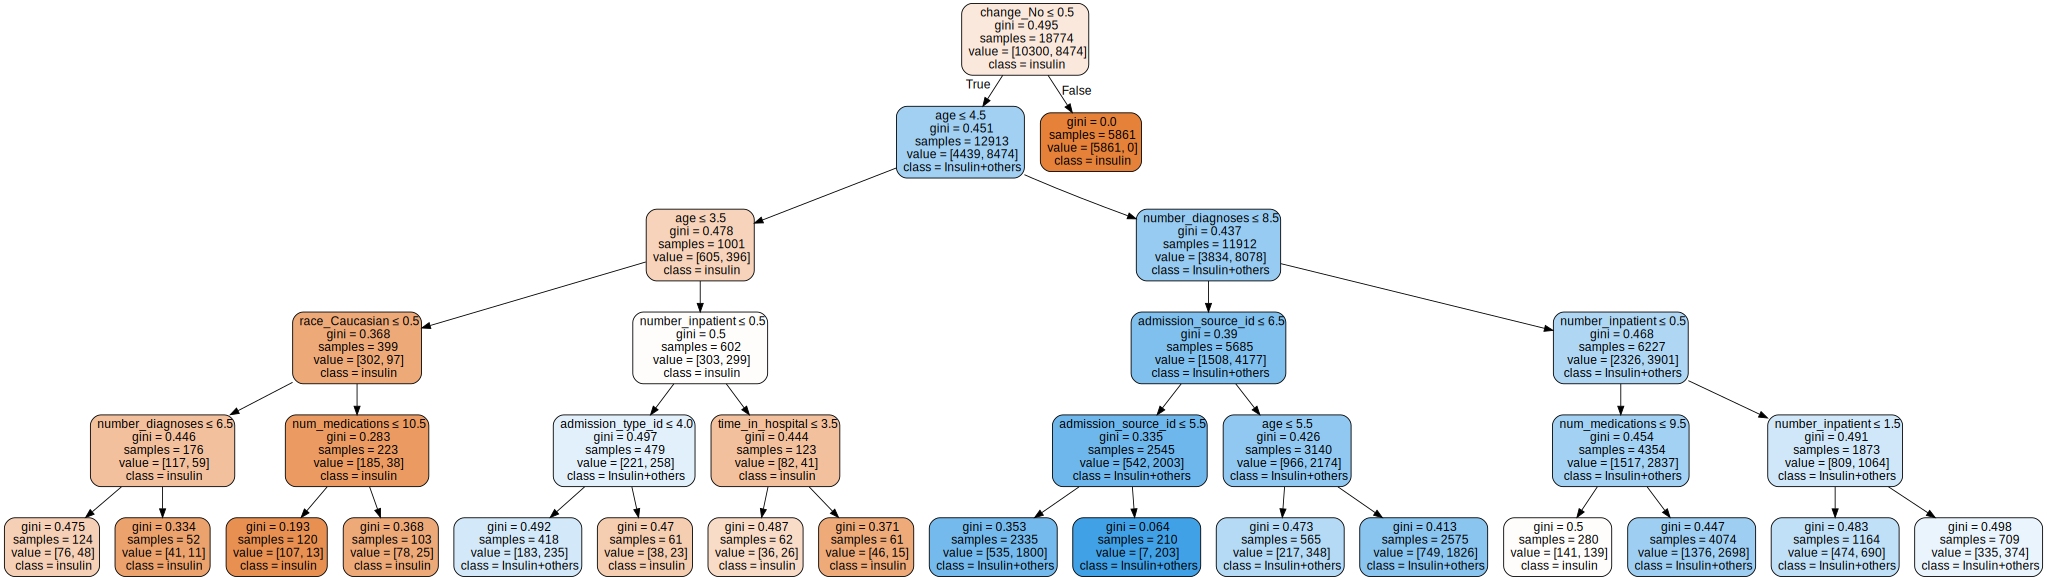

In [86]:
dot_data = export_graphviz(
    m6,
    out_file=None,
    feature_names=X.columns,
    class_names=['insulin', 'Insulin+others'],
    filled=True,
    rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph